## Visualization


- Utilize file "nyc_f_i_20k_plus.csv" created in the version of file "NYCHISYELP_calls_noapikey" that actually has api keys
- Compare Yelp Ratings to Health Inspection Score (a low score is good)
- Compare by borough and cuisine type

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import csv
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [2]:
#This is our source file with inspection data as of March 20, 2019
file = "nyc_f_i_20k_plus.csv"

In [3]:
#Read csv file into nyc_inspect and list columns
nyc_pr = pd.read_csv(file)
nyc_pr.head(50)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,Plumbing not properly installed or maintained;...,Not Critical,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,Facility not vermin proof. Harborage or condit...,Not Critical,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,Non-food contact surface improperly constructe...,Not Critical,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,Pesticide use not in accordance with label or ...,Not Critical,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31
5,40360076,CARVEL ICE CREAM,BROOKLYN,203,CHURCH AVENUE,11218.0,7184389501,"Ice Cream, Gelato, Yogurt, Ices",2018-03-20,Violations were cited in the following area(s).,...,Facility not vermin proof. Harborage or condit...,Not Critical,13.0,A,03/20/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$,27
6,40361322,CARVEL ICE CREAM,QUEENS,26515,HILLSIDE AVENUE,11004.0,7183430392,"Ice Cream, Gelato, Yogurt, Ices",2018-07-12,Violations were cited in the following area(s).,...,Food Protection Certificate not held by superv...,Critical,25.0,B,07/12/2018,03/20/2019,Cycle Inspection / Re-inspection,4.5,$$,3
7,40361618,SAL'S DELI,QUEENS,12908,20 AVENUE,11356.0,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,Food not protected from potential source of co...,Critical,11.0,A,06/05/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,10
8,40361998,STEVE CHU'S DELI & GROCERY,QUEENS,3406,10 STREET,11106.0,7187268888,Delicatessen,2018-07-18,Violations were cited in the following area(s).,...,Wiping cloths soiled or not stored in sanitizi...,Critical,5.0,A,07/18/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$,4
9,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE,10024.0,2127210045,American,2018-11-28,Violations were cited in the following area(s).,...,"Raw, cooked or prepared food is adulterated, c...",Critical,19.0,B,11/28/2018,03/20/2019,Cycle Inspection / Re-inspection,3.0,$$,142


In [4]:
# delete rows that did not return a price category
nyc_pr1 = nyc_pr[(nyc_pr['Price'].str.len() != 0)]
nyc_pr1.head(50)                 

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,Plumbing not properly installed or maintained;...,Not Critical,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,Facility not vermin proof. Harborage or condit...,Not Critical,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,Non-food contact surface improperly constructe...,Not Critical,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,Pesticide use not in accordance with label or ...,Not Critical,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31
5,40360076,CARVEL ICE CREAM,BROOKLYN,203,CHURCH AVENUE,11218.0,7184389501,"Ice Cream, Gelato, Yogurt, Ices",2018-03-20,Violations were cited in the following area(s).,...,Facility not vermin proof. Harborage or condit...,Not Critical,13.0,A,03/20/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$,27
6,40361322,CARVEL ICE CREAM,QUEENS,26515,HILLSIDE AVENUE,11004.0,7183430392,"Ice Cream, Gelato, Yogurt, Ices",2018-07-12,Violations were cited in the following area(s).,...,Food Protection Certificate not held by superv...,Critical,25.0,B,07/12/2018,03/20/2019,Cycle Inspection / Re-inspection,4.5,$$,3
7,40361618,SAL'S DELI,QUEENS,12908,20 AVENUE,11356.0,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,Food not protected from potential source of co...,Critical,11.0,A,06/05/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,10
8,40361998,STEVE CHU'S DELI & GROCERY,QUEENS,3406,10 STREET,11106.0,7187268888,Delicatessen,2018-07-18,Violations were cited in the following area(s).,...,Wiping cloths soiled or not stored in sanitizi...,Critical,5.0,A,07/18/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$,4
9,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE,10024.0,2127210045,American,2018-11-28,Violations were cited in the following area(s).,...,"Raw, cooked or prepared food is adulterated, c...",Critical,19.0,B,11/28/2018,03/20/2019,Cycle Inspection / Re-inspection,3.0,$$,142


In [5]:
nyc_pr1.iloc[47]['Price']

'$$$$'

In [6]:
# add a new column to hold a numeric value representing the Yelp price category
# please note that when there is $$$$ they simply don't visually show up in the dataframe, but they are there
nyc_pr1['PriceQ'] = ''
index = 1
for index, row in nyc_pr1.iterrows():
    if len((nyc_pr1.loc[index,'Price'])) == 1:
        nyc_pr1.loc[index,'PriceQ'] = '1'
    if len((nyc_pr1.loc[index,'Price'])) == 2:
        nyc_pr1.loc[index,'PriceQ'] = '2'
    if len((nyc_pr1.loc[index,'Price'])) == 3:
        nyc_pr1.loc[index,'PriceQ'] = '3'
    if len((nyc_pr1.loc[index,'Price'])) == 4:
        nyc_pr1.loc[index,'PriceQ'] = '4'
nyc_pr1.head(50)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,Not Critical,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41,2
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,Not Critical,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36,1
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,Not Critical,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99,2
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,Not Critical,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37,2
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,Not Critical,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31,1
5,40360076,CARVEL ICE CREAM,BROOKLYN,203,CHURCH AVENUE,11218.0,7184389501,"Ice Cream, Gelato, Yogurt, Ices",2018-03-20,Violations were cited in the following area(s).,...,Not Critical,13.0,A,03/20/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$,27,1
6,40361322,CARVEL ICE CREAM,QUEENS,26515,HILLSIDE AVENUE,11004.0,7183430392,"Ice Cream, Gelato, Yogurt, Ices",2018-07-12,Violations were cited in the following area(s).,...,Critical,25.0,B,07/12/2018,03/20/2019,Cycle Inspection / Re-inspection,4.5,$$,3,2
7,40361618,SAL'S DELI,QUEENS,12908,20 AVENUE,11356.0,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,Critical,11.0,A,06/05/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,10,1
8,40361998,STEVE CHU'S DELI & GROCERY,QUEENS,3406,10 STREET,11106.0,7187268888,Delicatessen,2018-07-18,Violations were cited in the following area(s).,...,Critical,5.0,A,07/18/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$,4,1
9,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE,10024.0,2127210045,American,2018-11-28,Violations were cited in the following area(s).,...,Critical,19.0,B,11/28/2018,03/20/2019,Cycle Inspection / Re-inspection,3.0,$$,142,2


In [7]:
nyc_pr1["PriceQ"] = nyc_pr1["PriceQ"].apply(pd.to_numeric, errors='coerce')

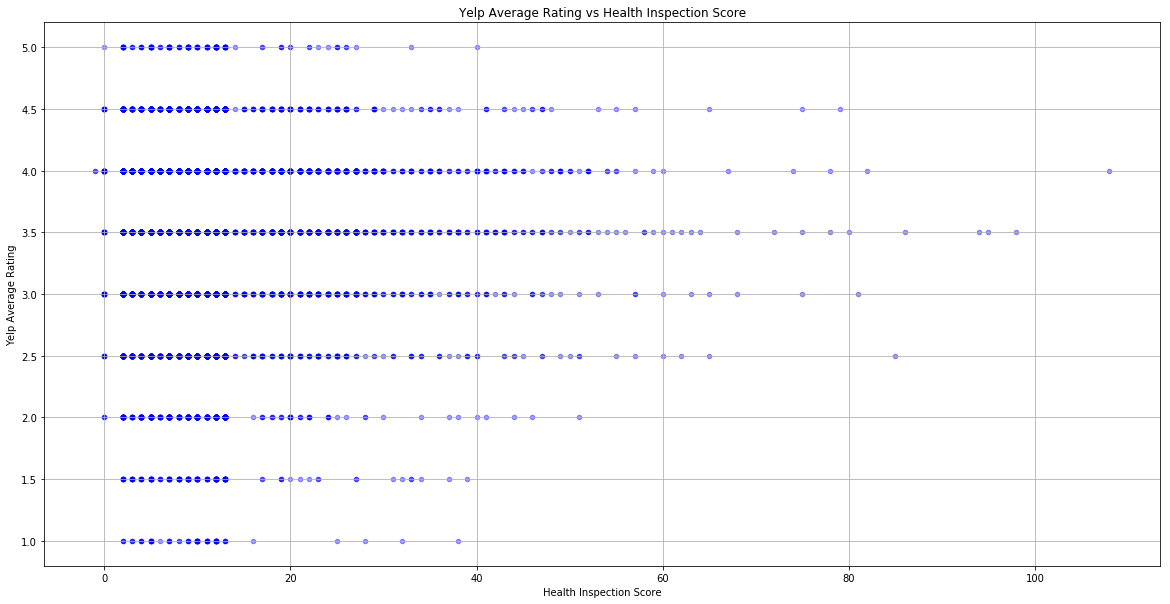

In [8]:
# plot health inspection score vs yelp rating for each restaraunt
plt.rcParams["figure.figsize"] = (20,10)
ax1 = nyc_pr1.plot(kind="scatter", x="SCORE", y="Average Rating",grid=True,color="blue",alpha=.4,)
ax1.set_xlabel("Health Inspection Score")
ax1.set_ylabel("Yelp Average Rating")

plt.title(f'Yelp Average Rating vs Health Inspection Score')
plt.savefig('Average_Rating_vs_Score_20k.png')
plt.show()

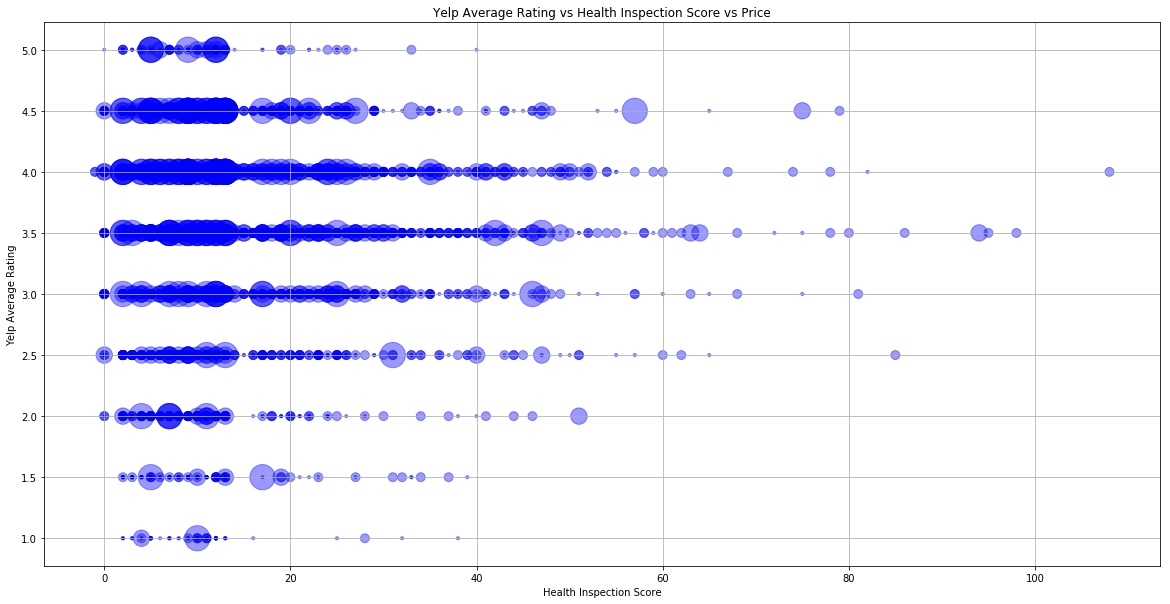

In [9]:
# add a price dimension to plot - bubble size()
nyc_pr1["PriceQ"] = nyc_pr1["PriceQ"].apply(pd.to_numeric, errors='coerce')
plt.rcParams["figure.figsize"] = (20,10)
ax1 = nyc_pr1.plot(kind="scatter", x="SCORE", y="Average Rating", s=(nyc_pr1["PriceQ"]*nyc_pr1["PriceQ"]*nyc_pr1["PriceQ"])*10,grid=True,color="blue",alpha=.4,)
ax1.set_xlabel("Health Inspection Score")
ax1.set_ylabel("Yelp Average Rating")

plt.title(f'Yelp Average Rating vs Health Inspection Score vs Price')
plt.savefig('Average_Rating_vs_Score_vs_Price_20k.png')
plt.show()

In [10]:
nyc_pr_20k = nyc_pr1
nyc_pr_20k.head(50)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,Not Critical,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41,2
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,Not Critical,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36,1
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,Not Critical,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99,2
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,Not Critical,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37,2
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,Not Critical,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31,1
5,40360076,CARVEL ICE CREAM,BROOKLYN,203,CHURCH AVENUE,11218.0,7184389501,"Ice Cream, Gelato, Yogurt, Ices",2018-03-20,Violations were cited in the following area(s).,...,Not Critical,13.0,A,03/20/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$,27,1
6,40361322,CARVEL ICE CREAM,QUEENS,26515,HILLSIDE AVENUE,11004.0,7183430392,"Ice Cream, Gelato, Yogurt, Ices",2018-07-12,Violations were cited in the following area(s).,...,Critical,25.0,B,07/12/2018,03/20/2019,Cycle Inspection / Re-inspection,4.5,$$,3,2
7,40361618,SAL'S DELI,QUEENS,12908,20 AVENUE,11356.0,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,Critical,11.0,A,06/05/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,10,1
8,40361998,STEVE CHU'S DELI & GROCERY,QUEENS,3406,10 STREET,11106.0,7187268888,Delicatessen,2018-07-18,Violations were cited in the following area(s).,...,Critical,5.0,A,07/18/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$,4,1
9,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE,10024.0,2127210045,American,2018-11-28,Violations were cited in the following area(s).,...,Critical,19.0,B,11/28/2018,03/20/2019,Cycle Inspection / Re-inspection,3.0,$$,142,2


In [18]:
yc_pr1 = nyc_pr1[(nyc_pr1['BORO'].str.len() != 0)]

In [30]:
# add a color to delineate boroughs
# add a column with related color for plot
nyc_pr_20k['boro_color'] = ""
index = 1

for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='BRONX':
        nyc_pr_20k.loc[index,'boro_color'] = 'blue'
    if nyc_pr_20k.loc[index,'BORO']=='BROOKLYN':
        nyc_pr_20k.loc[index,'boro_color'] = 'green'
    if nyc_pr_20k.loc[index,'BORO']=='MANHATTAN':
        nyc_pr_20k.loc[index,'boro_color'] = 'c' 
    if nyc_pr_20k.loc[index,'BORO']=='QUEENS':
        nyc_pr_20k.loc[index,'boro_color'] = 'red'
    if nyc_pr_20k.loc[index,'BORO']=='STATEN ISLAND':
        nyc_pr_20k.loc[index,'boro_color'] = 'magenta'

In [31]:
nyc_pr_20k.head(20000)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ,boro_color
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41,2,blue
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36,1,green
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99,2,c
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37,2,green
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31,1,green
5,40360076,CARVEL ICE CREAM,BROOKLYN,203,CHURCH AVENUE,11218.0,7184389501,"Ice Cream, Gelato, Yogurt, Ices",2018-03-20,Violations were cited in the following area(s).,...,13.0,A,03/20/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$,27,1,green
6,40361322,CARVEL ICE CREAM,QUEENS,26515,HILLSIDE AVENUE,11004.0,7183430392,"Ice Cream, Gelato, Yogurt, Ices",2018-07-12,Violations were cited in the following area(s).,...,25.0,B,07/12/2018,03/20/2019,Cycle Inspection / Re-inspection,4.5,$$,3,2,red
7,40361618,SAL'S DELI,QUEENS,12908,20 AVENUE,11356.0,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,11.0,A,06/05/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,10,1,red
8,40361998,STEVE CHU'S DELI & GROCERY,QUEENS,3406,10 STREET,11106.0,7187268888,Delicatessen,2018-07-18,Violations were cited in the following area(s).,...,5.0,A,07/18/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$,4,1,red
9,40362098,HARRIET'S KITCHEN,MANHATTAN,502,AMSTERDAM AVENUE,10024.0,2127210045,American,2018-11-28,Violations were cited in the following area(s).,...,19.0,B,11/28/2018,03/20/2019,Cycle Inspection / Re-inspection,3.0,$$,142,2,c


In [32]:
nyc_pr_20k.query('boro_color == ""')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ,boro_color


In [26]:
nyc_pr_20k = nyc_pr_20k.drop([9153,9168,11694,13594])

In [33]:
nyc_pr_20k["PriceQ"] = nyc_pr_20k["PriceQ"].apply(pd.to_numeric, errors='coerce')
nyc_pr_20k["PriceQ"].dtypes

dtype('int64')

In [34]:

nyc_pr1 = nyc_pr1[(nyc_pr1['boro_color'].str.len() != 0)]

No handles with labels found to put in legend.


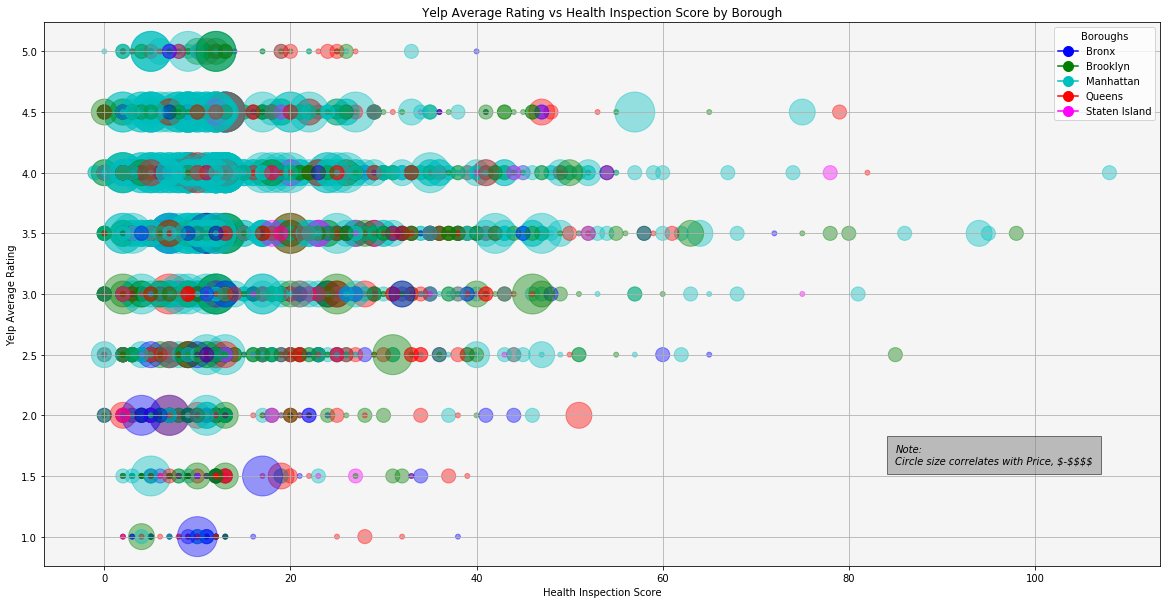

In [56]:
# plot Yelp rating vs Health Inspeciton Score, including price range and by borough
plt.rcParams["figure.figsize"] = (20,10)
ax1 = nyc_pr_20k.plot(kind="scatter", x="SCORE", y="Average Rating", s=(nyc_pr_20k["PriceQ"]*nyc_pr_20k["PriceQ"]*nyc_pr_20k["PriceQ"])*25,grid=True,color=nyc_pr_20k['boro_color'],alpha=.4)
ax1.set_xlabel("Health Inspection Score")
ax1.set_ylabel("Yelp Average Rating")
ax1.set_facecolor('whitesmoke')

xy = (1,1)
bronx_l = Line2D([0], [0], marker='o', color='blue', label='Bronx', markerfacecolor='blue', markersize=10)
brook_l = Line2D([0], [0], marker='o', color='green', label='Brooklyn', markerfacecolor='green', markersize=10)    
manh_l = Line2D([0], [0], marker='o', color='c', label='Manhattan', markerfacecolor='c', markersize=10)  
quee_l = Line2D([0], [0], marker='o', color='red', label='Queens', markerfacecolor='red', markersize=10)  
stat_l = Line2D([0], [0], marker='o', color='magenta', label='Staten Island', markerfacecolor='magenta', markersize=10)  

legend = plt.legend(title="Boroughs", ncol=1)
plt.legend(title="Boroughs",handles=[bronx_l,brook_l,manh_l,quee_l,stat_l,])

ax1.text(85, 1.6, 'Note:\nCircle size correlates with Price, $-$$$$', style='italic',
        bbox={'facecolor':'grey', 'alpha':0.5, 'pad':8})
plt.title(f'Yelp Average Rating vs Health Inspection Score by Borough')
plt.savefig('Average_Rating_vs_Score_vs_Boro_20k.png')
plt.show()

No handles with labels found to put in legend.


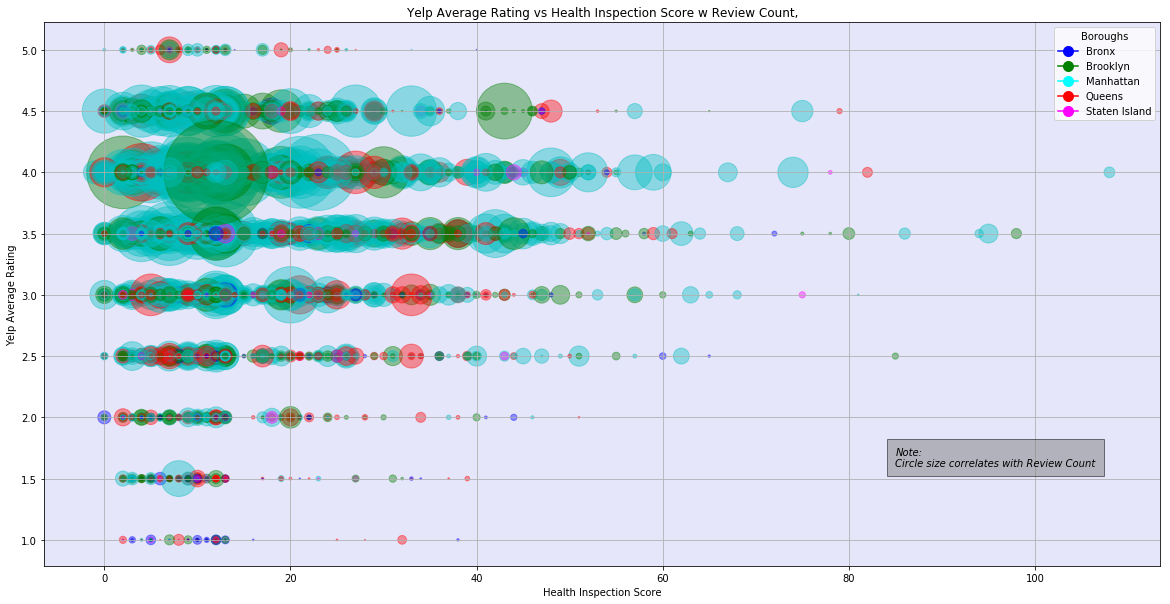

In [57]:
# plot Yelp rating vs Health Inspeciton Score, including review count and by borough
nyc_pr_20k["Review_Count"] = nyc_pr_20k["Review_Count"].apply(pd.to_numeric, errors='coerce')
plt.rcParams["figure.figsize"] = (20,10)
ax1 = nyc_pr_20k.plot(kind="scatter", x="SCORE", y="Average Rating", s=(nyc_pr_20k["Review_Count"]),grid=True,color=nyc_pr_20k['boro_color'],alpha=.4)
ax1.set_xlabel("Health Inspection Score")
ax1.set_ylabel("Yelp Average Rating")
ax1.set_facecolor('lavender')

xy = (1,1)
bronx_l = Line2D([0], [0], marker='o', color='blue', label='Bronx', markerfacecolor='blue', markersize=10)
brook_l = Line2D([0], [0], marker='o', color='green', label='Brooklyn', markerfacecolor='green', markersize=10)    
manh_l = Line2D([0], [0], marker='o', color='aqua', label='Manhattan', markerfacecolor='aqua', markersize=10)  
quee_l = Line2D([0], [0], marker='o', color='red', label='Queens', markerfacecolor='red', markersize=10)  
stat_l = Line2D([0], [0], marker='o', color='magenta', label='Staten Island', markerfacecolor='magenta', markersize=10)  

legend = plt.legend(title="Boroughs", ncol=1)
plt.legend(title="Boroughs",handles=[bronx_l,brook_l,manh_l,quee_l,stat_l,])

ax1.text(85, 1.6, 'Note:\nCircle size correlates with Review Count', style='italic',
        bbox={'facecolor':'grey', 'alpha':0.5, 'pad':8})
plt.title(f'Yelp Average Rating vs Health Inspection Score w Review Count,')
plt.savefig('Average_Rating_vs_Score_vs_Boro_w_Review_Count_20k.png')
plt.show()

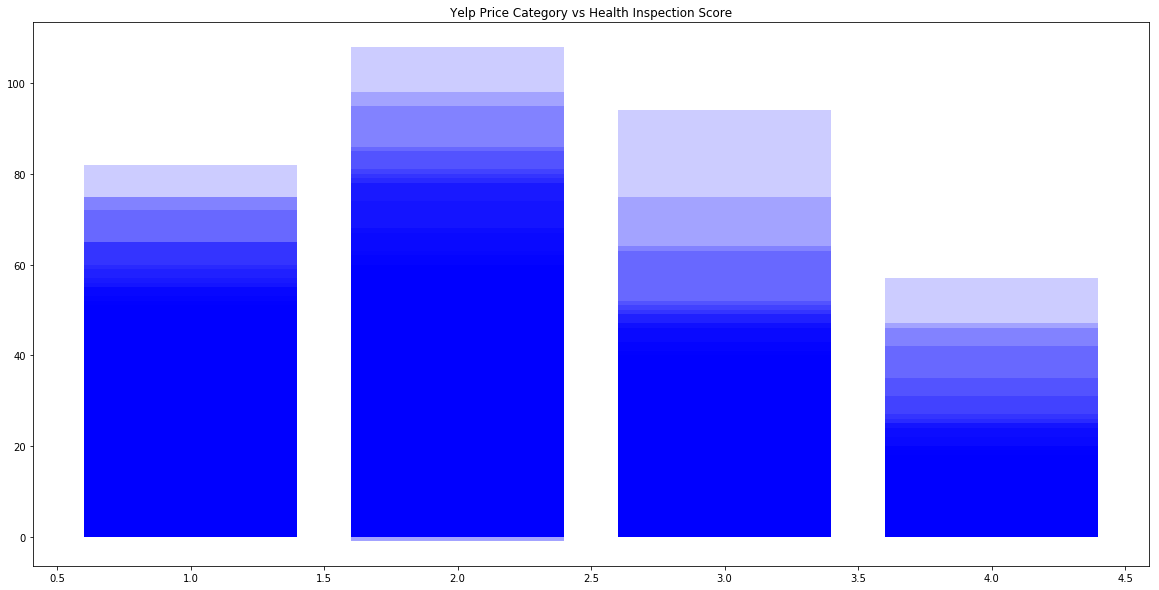

In [37]:
# plot violation score vs Yelp price (1=$,2=$$, etc..)
ax2 = plt.bar(nyc_pr_20k['PriceQ'], nyc_pr_20k["SCORE"], color='blue', alpha=0.2, align="center")


plt.title(f'Yelp Price Category vs Health Inspection Score')
plt.savefig('Price_vs_Score_20k.png')
plt.show()

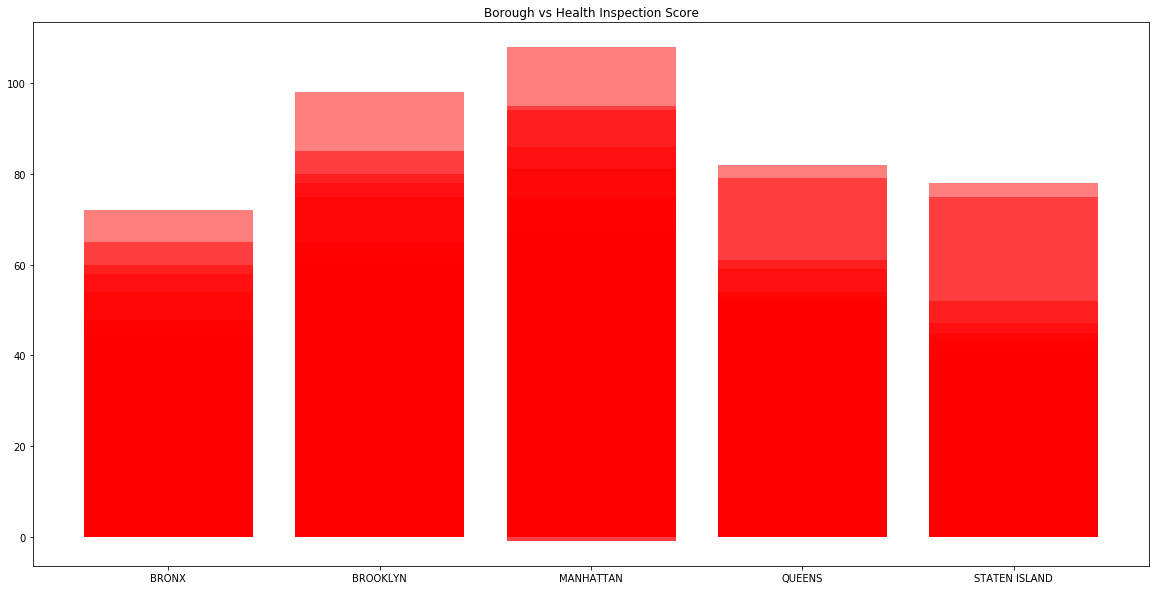

In [38]:
# plot violation score by Borough 
ax2 = plt.bar(nyc_pr_20k['BORO'], nyc_pr_20k["SCORE"], color='red', alpha=0.5, align="center")
plt.title(f'Borough vs Health Inspection Score')
plt.savefig('Boro_vs_Score_20k.png')
plt.show()

In [39]:
# find review count per borrough
bronx_count = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='BRONX':
        bronx_count += 1
print(f'bronx count: {bronx_count}')

brook_count = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='BROOKLYN':
        brook_count += 1
print(f'brooklyn count: {brook_count}')

manh_count = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='MANHATTAN':      
        manh_count += 1
print(f'manhattan count: {manh_count}')
        
quee_count = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='QUEENS':
        quee_count += 1
print(f'queens count: {quee_count}')

stat_count = 0
index = 1
for index, row in nyc_pr1.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='STATEN ISLAND':
        stat_count += 1
print(f'staten island count: {stat_count}')
score_counts = [bronx_count,brook_count,manh_count,quee_count,stat_count]
score_counts

bronx count: 924
brooklyn count: 3350
manhattan count: 6089
queens count: 2958
staten island count: 512


[924, 3350, 6089, 2958, 512]

In [41]:
#find sum of violation score per borough
bronx_score = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='BRONX':
        bronx_score = nyc_pr_20k.loc[index,'SCORE'] + bronx_score
print(f'bronx score total: {bronx_score}')

brook_score = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='BROOKLYN':
        brook_score = nyc_pr_20k.loc[index,'SCORE'] + brook_score
print(f'brooklyn score total: {brook_score}')

manh_score = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='MANHATTAN':
        manh_score = nyc_pr_20k.loc[index,'SCORE'] + manh_score
print(f'manhattan score total: {manh_score}')

quee_score = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='QUEENS':
        quee_score = nyc_pr_20k.loc[index,'SCORE'] + quee_score
print(f'queens score total: {quee_score}')

stat_score = 0
index = 1
for index, row in nyc_pr_20k.iterrows():
    if nyc_pr_20k.loc[index,'BORO']=='STATEN ISLAND':
        stat_score = nyc_pr_20k.loc[index,'SCORE'] + stat_score
print(f'staten island score total: {stat_score}')

score_totals = [bronx_score,brook_score,manh_score,quee_score,stat_score]
score_totals

bronx score total: 10984.0
brooklyn score total: 39290.0
manhattan score total: 71322.0
queens score total: 34358.0
staten island score total: 6107.0


[10984.0, 39290.0, 71322.0, 34358.0, 6107.0]

In [42]:
# create the a dataframe to plot averages per borough
score_df = pd.DataFrame(score_counts)
score_df["boro"] = ['Bronx','Brooklyn','Manhattan',"Queens","Staten Island"]
score_df["score totals"]=score_totals
score_df.rename(columns = {0:"score count"}, inplace=True)
score_df

,score count,boro,score totals
0,924,Bronx,10984.0
1,3350,Brooklyn,39290.0
2,6089,Manhattan,71322.0
3,2958,Queens,34358.0
4,512,Staten Island,6107.0


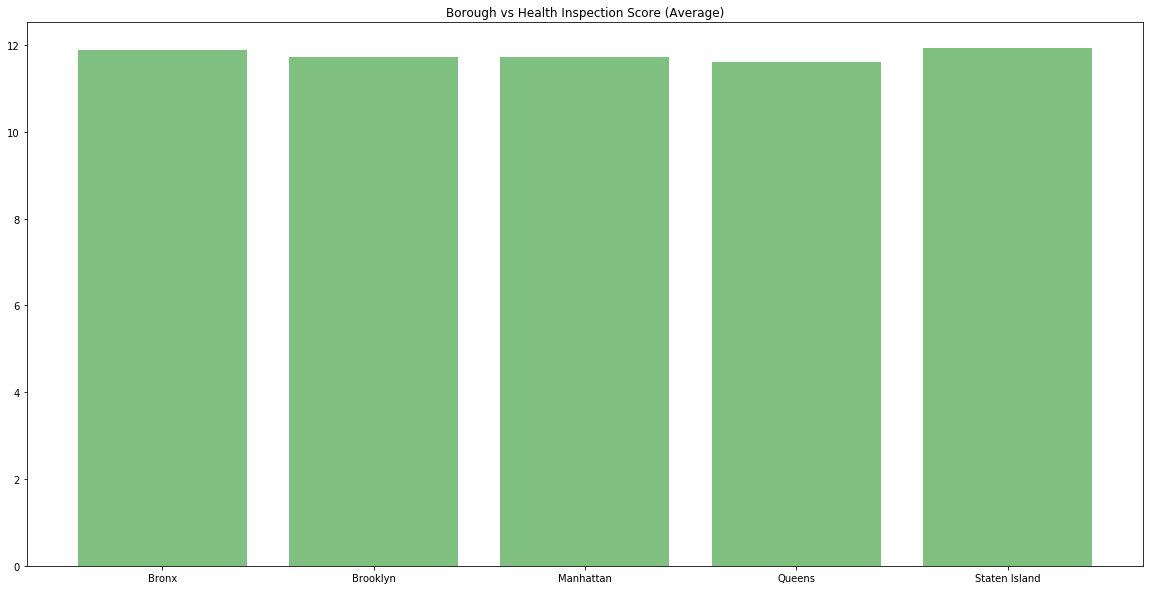

In [43]:
# plot average health inspection score per borough
ax2 = plt.bar(score_df['boro'], score_df["score totals"]/score_df["score count"], color='green', alpha=0.5, align="center")
plt.title(f'Borough vs Health Inspection Score (Average)')
plt.savefig('Boro_vs_Score_20k.png')
plt.show()



In [44]:
nyc_pr_20k.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION_DATE,ACTION,...,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION_TYPE,Average Rating,Price,Review_Count,PriceQ,boro_color
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,5.0,A,05/11/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.0,$$,41,2,blue
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,13.0,A,03/04/2019,03/20/2019,Cycle Inspection / Initial Inspection,2.0,$,36,1,green
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,Violations were cited in the following area(s).,...,12.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,99,2,c
3,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234.0,7184443838,Delicatessen,2018-05-10,Violations were cited in the following area(s).,...,13.0,A,05/10/2018,03/20/2019,Cycle Inspection / Initial Inspection,3.5,$$,37,2,green
4,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE,11226.0,7188560821,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,Violations were cited in the following area(s).,...,13.0,A,05/16/2018,03/20/2019,Cycle Inspection / Initial Inspection,4.5,$,31,1,green


In [45]:
nyc_pr_20k.to_csv("nyc_pr_20k_plus_colorsprice.csv", index=False, header=True)

In [46]:
nyc_pr_20k['CUISINE DESCRIPTION'].nunique()

85

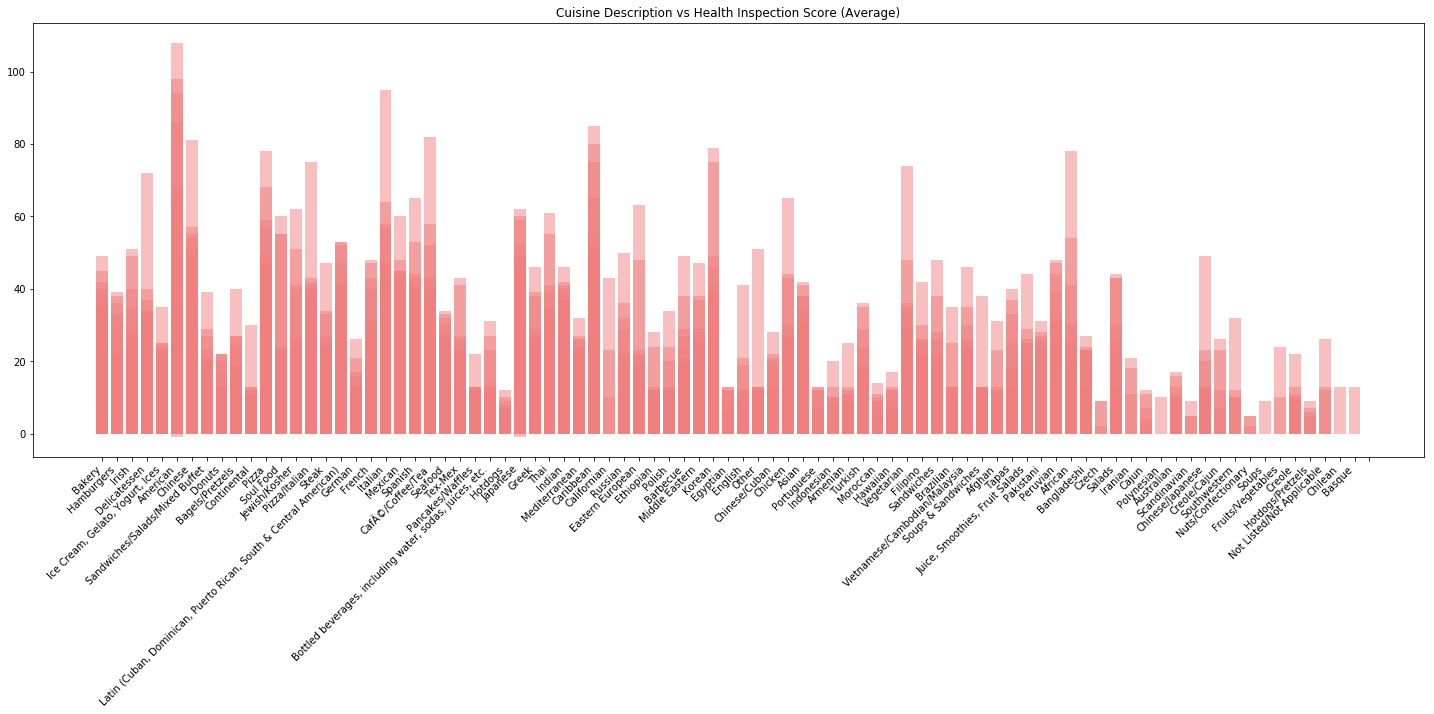

In [47]:
# plot health inspection score by cuisine
ax3 = plt.bar(nyc_pr_20k['CUISINE DESCRIPTION'], nyc_pr_20k['SCORE'], color='lightcoral', alpha=0.5, align="center")
plt.title(f'Cuisine Description vs Health Inspection Score (Average)')
plt.xticks(range(0, nyc_pr_20k['CUISINE DESCRIPTION'].nunique() + 1),rotation = 45,ha="right")

plt.tight_layout(pad=1)
plt.savefig('Cuisine_vs_Score.png')
plt.show()


In [48]:
cuisine_list = nyc_pr_20k['CUISINE DESCRIPTION'].unique()
print(cuisine_list)

nyc_pr_20k['CUISINE DESCRIPTION'].value_counts()

['Bakery' 'Hamburgers' 'Irish' 'Delicatessen'
 'Ice Cream, Gelato, Yogurt, Ices' 'American' 'Chinese'
 'Sandwiches/Salads/Mixed Buffet' 'Donuts' 'Bagels/Pretzels' 'Continental'
 'Pizza' 'Soul Food' 'Jewish/Kosher' 'Pizza/Italian' 'Steak'
 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)'
 'German' 'French' 'Italian' 'Mexican' 'Spanish' 'CafÃ©/Coffee/Tea'
 'Seafood' 'Tex-Mex' 'Pancakes/Waffles'
 'Bottled beverages, including water, sodas, juices, etc.' 'Hotdogs'
 'Japanese' 'Greek' 'Thai' 'Indian' 'Mediterranean' 'Caribbean'
 'Californian' 'Russian' 'Eastern European' 'Ethiopian' 'Polish'
 'Barbecue' 'Middle Eastern' 'Korean' 'Egyptian' 'English' 'Other'
 'Chinese/Cuban' 'Chicken' 'Asian' 'Portuguese' 'Indonesian' 'Armenian'
 'Turkish' 'Moroccan' 'Hawaiian' 'Vegetarian' 'Filipino' 'Sandwiches'
 'Brazilian' 'Vietnamese/Cambodian/Malaysia' 'Soups & Sandwiches' 'Afghan'
 'Tapas' 'Juice, Smoothies, Fruit Salads' 'Pakistani' 'Peruvian' 'African'
 'Bangladeshi' 'Czech' 'Salad

American                                                            3130
Chinese                                                             1159
CafÃ©/Coffee/Tea                                                     761
Italian                                                              753
Pizza                                                                734
Japanese                                                             543
Mexican                                                              535
Bakery                                                               440
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     421
Pizza/Italian                                                        344
Caribbean                                                            297
Hamburgers                                                           269
Donuts                                                               268
Spanish                                            

In [49]:
# find average score per cuisine type
c_score_list = []
c_score_avg_list = []
index = 1

for c in cuisine_list:
    c_score = 0
    c_score_avg = 0
    count = 0
    for index, row in nyc_pr_20k.iterrows():        
        if nyc_pr_20k.loc[index,'CUISINE DESCRIPTION'] == c:
            count += 1
            c_score = nyc_pr_20k.loc[index,'SCORE'] + c_score
            c_score_avg = c_score/count
    c_score_list.append(c_score) 
    c_score_avg_list.append(c_score_avg)
print(f'c_score_list: {c_score_list}')
print(f'c_score_avg_list: {c_score_avg_list}')

c_score_list: [4935.0, 2519.0, 1874.0, 2260.0, 1602.0, 36656.0, 14140.0, 1181.0, 2075.0, 1241.0, 203.0, 8349.0, 537.0, 1947.0, 4041.0, 836.0, 5470.0, 299.0, 2833.0, 9241.0, 6307.0, 3478.0, 6893.0, 1389.0, 941.0, 119.0, 409.0, 64.0, 6933.0, 1199.0, 2325.0, 2802.0, 1704.0, 4175.0, 76.0, 596.0, 677.0, 173.0, 228.0, 427.0, 1192.0, 2278.0, 80.0, 159.0, 233.0, 184.0, 2167.0, 2558.0, 64.0, 70.0, 118.0, 554.0, 58.0, 84.0, 913.0, 371.0, 1771.0, 271.0, 762.0, 284.0, 121.0, 320.0, 845.0, 279.0, 879.0, 552.0, 292.0, 20.0, 515.0, 50.0, 37.0, 10.0, 84.0, 19.0, 347.0, 68.0, 64.0, 12.0, 9.0, 34.0, 75.0, 27.0, 51.0, 13.0, 13.0]
c_score_avg_list: [11.215909090909092, 9.364312267657992, 11.7125, 12.417582417582418, 9.260115606936417, 11.711182108626199, 12.200172562553925, 9.601626016260163, 7.742537313432836, 10.791304347826086, 10.15, 11.374659400544958, 15.342857142857143, 12.093167701863354, 11.747093023255815, 12.294117647058824, 12.992874109263658, 11.96, 12.37117903930131, 12.272244355909695, 11.7

In [50]:
#len(c_score_list)
len(c_score_avg_list)

85

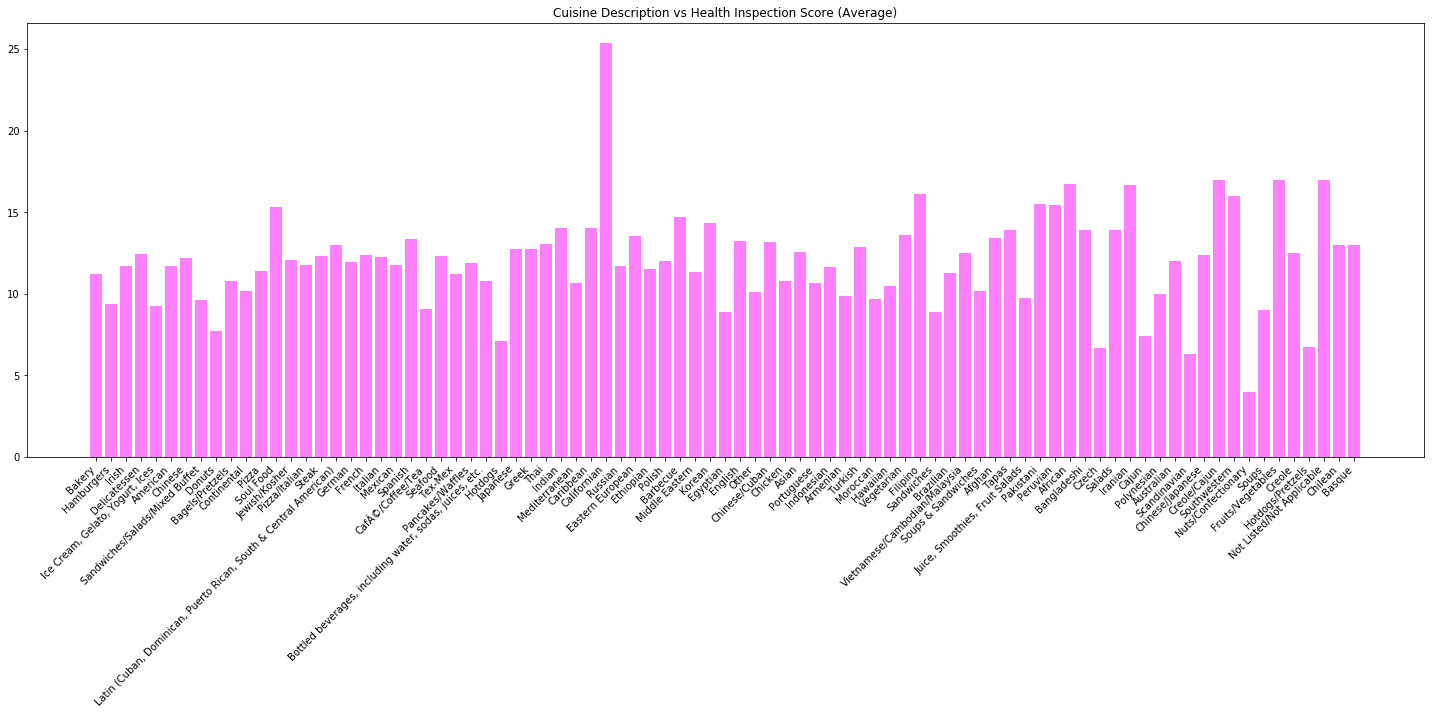

In [53]:
# plot average health inspection score by cuisine
ax4 = plt.bar(cuisine_list, c_score_avg_list, color='magenta', alpha=0.5, align="center")
plt.title(f'Cuisine Description vs Health Inspection Score (Average)')
plt.xticks(range(0, nyc_pr_20k['CUISINE DESCRIPTION'].nunique()),rotation = 45,ha="right")
plt.tight_layout(pad=1)
plt.savefig('Cuisine_vs_Avg_Score_20k.png')
plt.show()

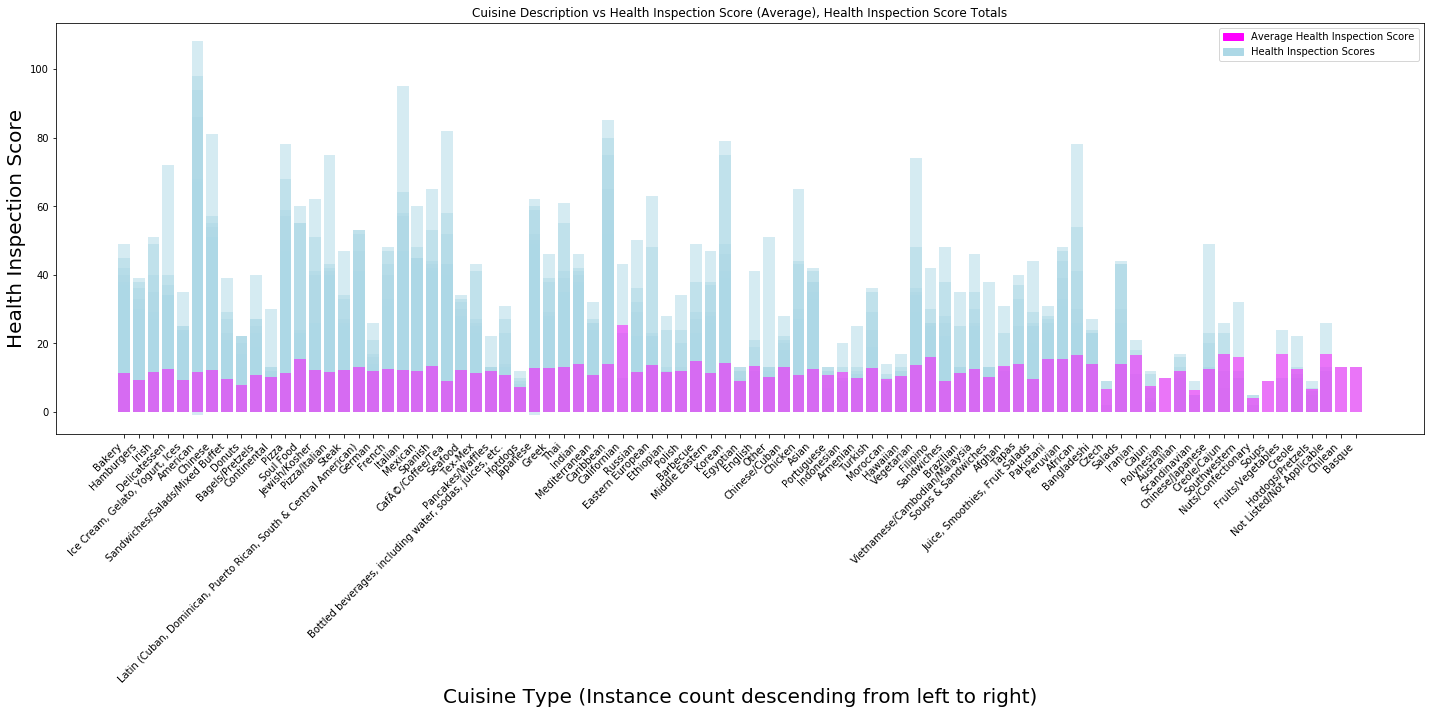

In [52]:
# plot average health inspection with health inspection scores by cuisine
ax3 = plt.bar(nyc_pr_20k['CUISINE DESCRIPTION'], nyc_pr_20k['SCORE'], color='lightblue', alpha=0.5, align="center")
ax4 = plt.bar(cuisine_list, c_score_avg_list, color='magenta', alpha=0.5, align="center")
plt.title(f'Cuisine Description vs Health Inspection Score (Average), Health Inspection Score Totals')
plt.xticks(range(0, nyc_pr_20k['CUISINE DESCRIPTION'].nunique()),rotation = 45,ha="right")

avg_score = mpatches.Patch(color='magenta', label='Average Health Inspection Score')
hs_score = mpatches.Patch(color='lightblue', label='Health Inspection Scores')

plt.legend(handles=[avg_score,hs_score])
plt.xlabel("Cuisine Type (Instance count descending from left to right)",fontsize=20)
plt.ylabel("Health Inspection Score",fontsize=20)
plt.tight_layout(pad=1)
plt.savefig('Cuisine_vs_Avg_Score_vs_Score_20k.png')
plt.show()